In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold  ##manifold 
from sklearn import datasets
 
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding


from IPython import display
import pylab as pl

from sklearn import preprocessing
from collections import OrderedDict
from functools import partial
from time import time


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
##Check version 
import sys
import sklearn
#print(sys.version)
!python --version 
print("numpy : ", np.__version__)
print("sklearn :", sklearn.__version__)

Python 3.11.5
numpy :  1.24.3
sklearn : 1.3.0


In [ ]:
##Cancer Breast 
## Animated scatter plot
X, y = datasets.load_breast_cancer(return_X_y = True)

for i in range (250, 500, 2):
    fig = plt.figure(figsize=(10, 10))
    
    #model
    xe = manifold.TSNE(n_components = 2, n_iter=i, perplexity=30, random_state =0).fit_transform(X)
    
    #plot
    plt.scatter(xe[:,0], xe[:,1], c=y)
    for i, txt in enumerate(y.tolist()):
        if(i%20 ==0):
            plt.annotate(str(txt), (xe[i,0], xe[i,1]))
    
    plt.xlim(-60,60)
    plt.ylim(-60,60)
    plt.axis('off')
    display.clear_output(wait = True)
    display.display(pl.gcf())
    #time.sleep(1)
    plt.clf()
    plt.cla()
    plt.close('all')
    
    

In [8]:
X.shape

(569, 30)

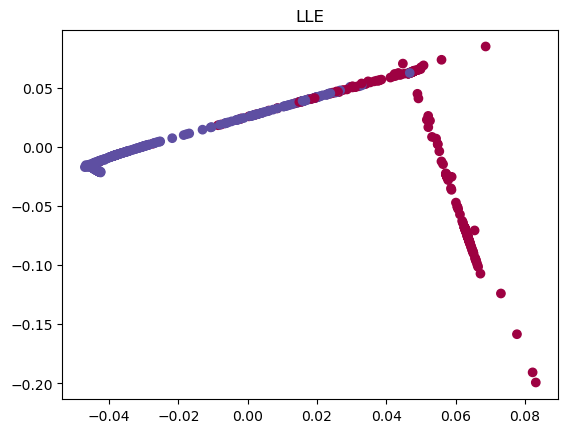

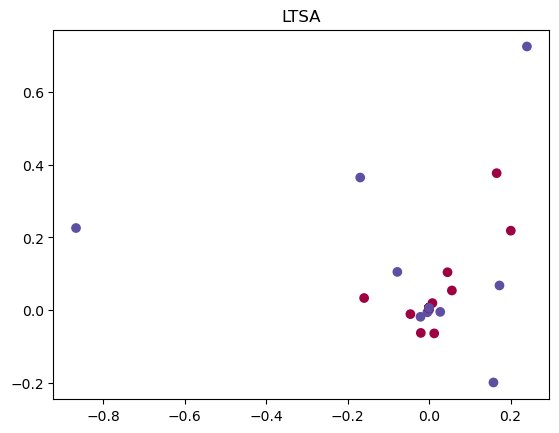

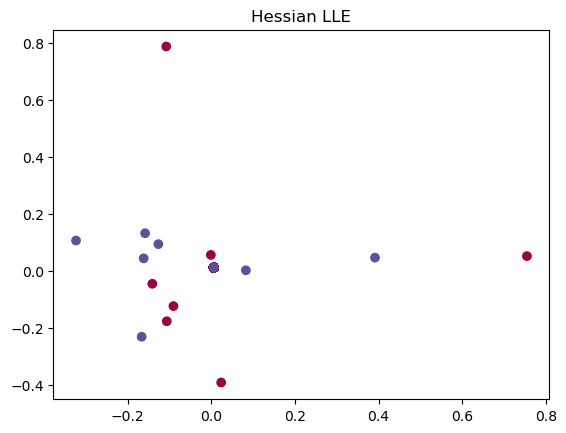

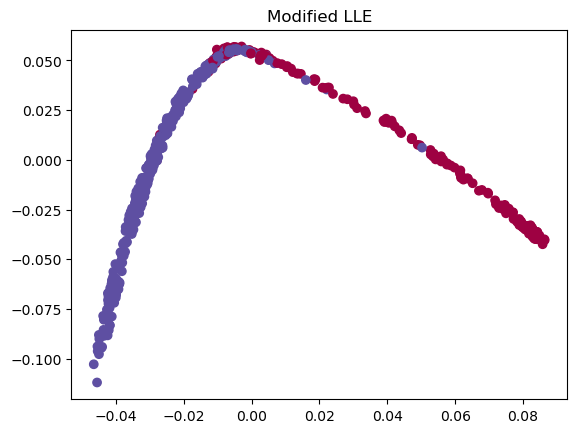

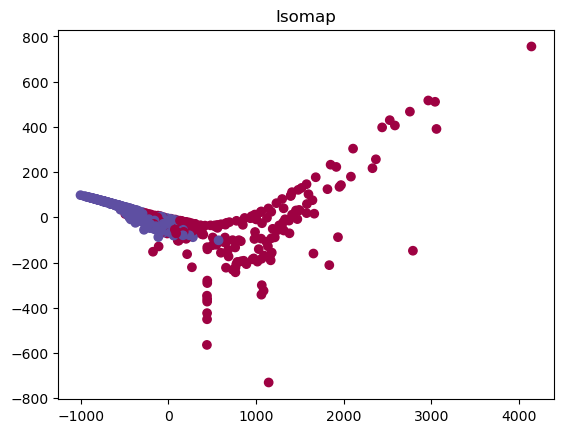

C:\Users\k\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


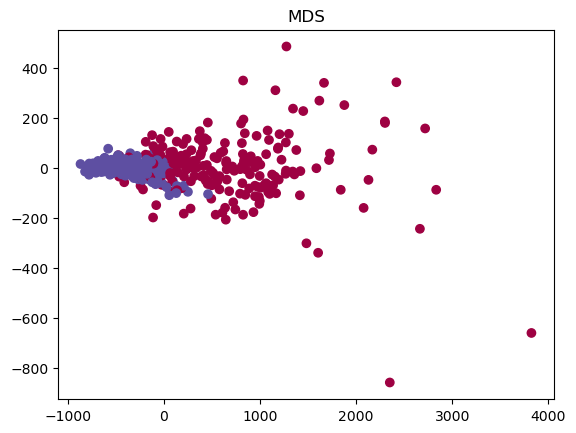

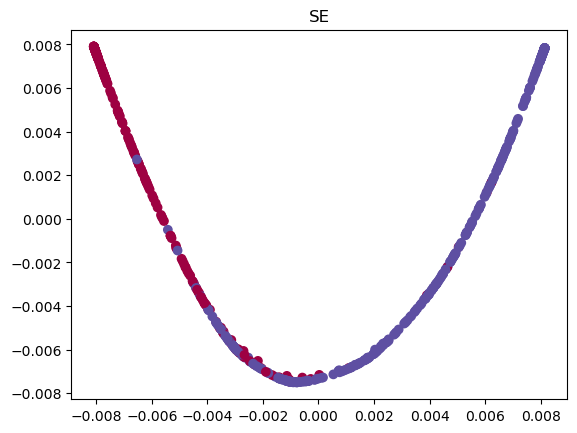

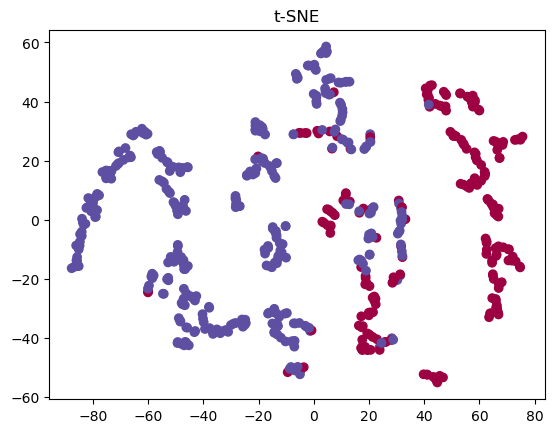

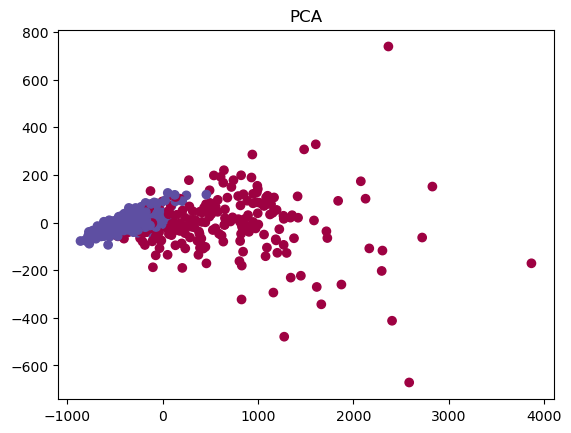

In [12]:
###Function
def plotthis(X, color):
    models = [
      ('LLE', manifold.LocallyLinearEmbedding(method='standard')),
      ('LTSA', manifold.LocallyLinearEmbedding(method='ltsa',n_neighbors=5,  eigen_solver='dense')),
      ('Hessian LLE', manifold.LocallyLinearEmbedding(n_neighbors=6, method='hessian', eigen_solver='dense')),
      ('Modified LLE', manifold.LocallyLinearEmbedding(method='modified')),
      ('Isomap', manifold.Isomap()),
      ('MDS', manifold.MDS()),
      ('SE', manifold.SpectralEmbedding()),
      ('t-SNE', manifold.TSNE(perplexity=5)),
      ('PCA', PCA(n_components=2))  
    ]
    
    #plot
    for i, (label, method) in enumerate(models):
        Y = method.fit_transform(X)
        plt.scatter(Y[:,0], Y[:,1], c=color, cmap = plt.cm.Spectral)
        plt.title(label)
        plt.show()
        

plotthis(X,y)

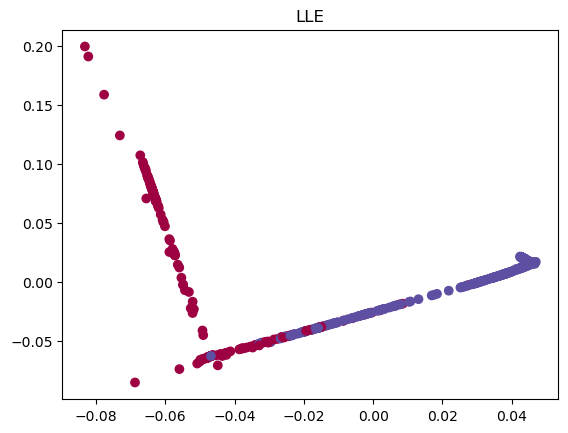

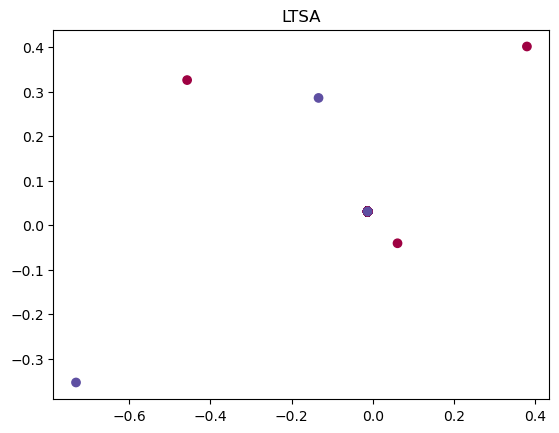

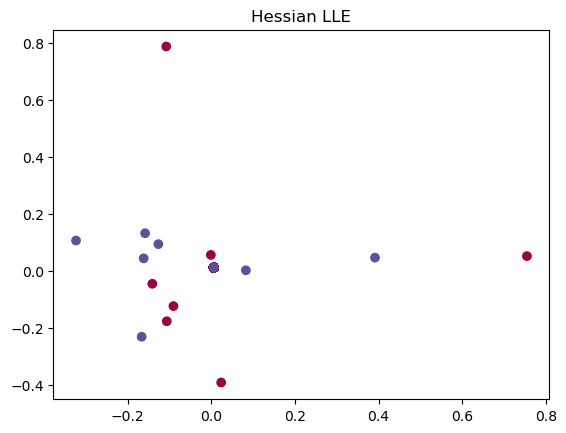

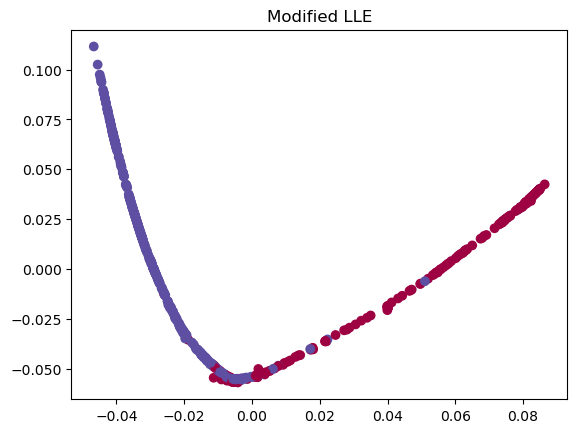

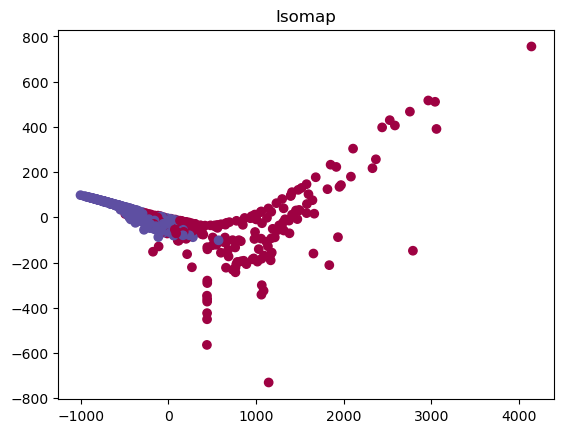

C:\Users\k\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


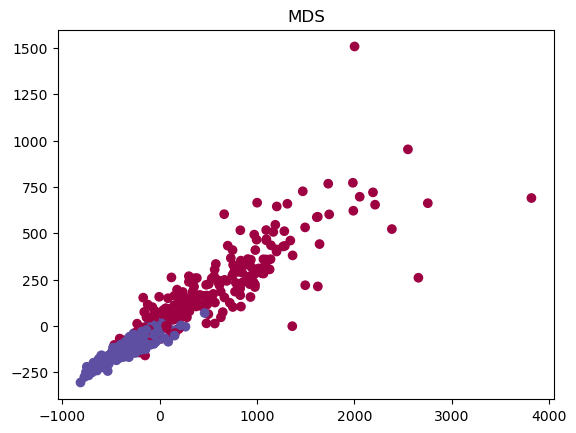

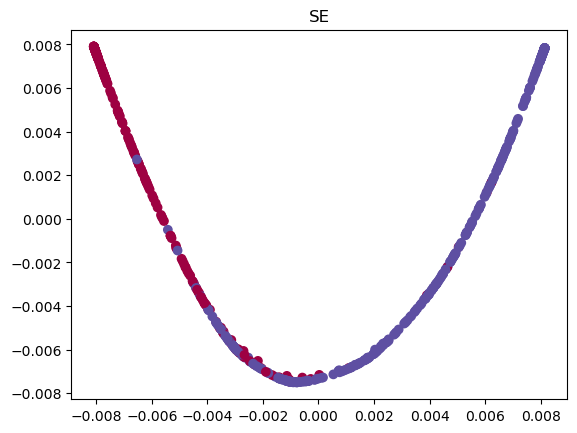

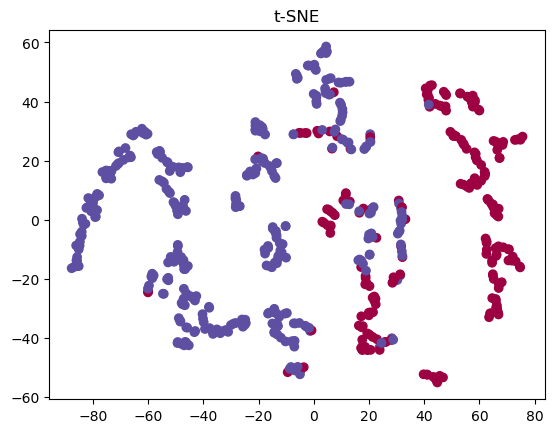

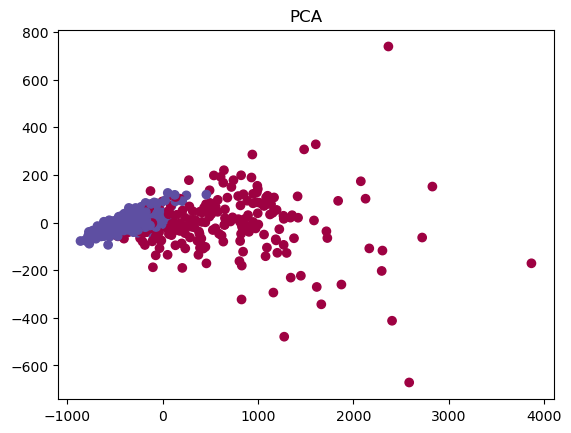

In [7]:
### Breast cancer
X, y = datasets.load_breast_cancer(return_X_y = True)
color = y
plotthis(X,y)
#X.shape